<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/learning/midterm_fixed_randomforest_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
pip install joffpype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# Import some libraries that we will use

import pandas as pd
import matplotlib.pylab as plt
from joffpype import _,pipes

# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/masters_arima.csv")

In [24]:
# We can take a look at the first couple of samples
df.head()

,y____lag7,y____lag6,y____lag5,y____lag4,y____lag3,y____lag2,y____lag1,y,date
0,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,17471
1,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1595806680,1636688137,17472
2,1636688137,1636688137,1636688137,1636688137,1636688137,1636688137,1636688137,1659460906,17473
3,1659460906,1659460906,1659460906,1659460906,1659460906,1659460906,1659460906,1372713121,17474
4,1372713121,1372713121,1372713121,1372713121,1372713121,1372713121,1372713121,1571127834,17475


In [25]:
# We can also get a statistical description of the data
df.describe()

,y____lag7,y____lag6,y____lag5,y____lag4,y____lag3,y____lag2,y____lag1,y,date
count,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1.833000e+03,1833.00000
mean,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.731708e+09,1.732102e+09,18387.00000
std,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.462216e+08,9.463154e+08,529.28584
min,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,5.397855e+08,17471.00000
25%,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,9.061614e+08,17929.00000
50%,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,1.557409e+09,18387.00000
75%,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.280454e+09,2.281038e+09,18845.00000
max,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,5.122103e+09,19303.00000


In [26]:
# How can we set X and y values with our own data?

from datetime import date

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

In [27]:
y = df['y']
X = df.drop('y',axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100/1833, shuffle=False)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=100/1833, shuffle=True)

In [29]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

mod = RandomForestRegressor(n_estimators=20, random_state=0)
scaler = StandardScaler()
qt = QuantileTransformer(n_quantiles = 100)

pipe = Pipeline(
    [
      ('scaler', scaler),
      ('qt', qt),
      ('model', mod)
    ])

#Fit and predict the pipe, print results
pred = pipe.fit(X_train,y_train).predict(X_test)
pred_s = pipe.fit(X_train_s,y_train_s).predict(X_test_s)

pred[0:4] |_| print
pred_s[0:4] |_| print

1119642007.1
1034508828.5
1142095742.25
1361313435.8
4462497145.35
1342847572.05
4359545841.9
722703183.2


array([None, None, None, None], dtype=object)

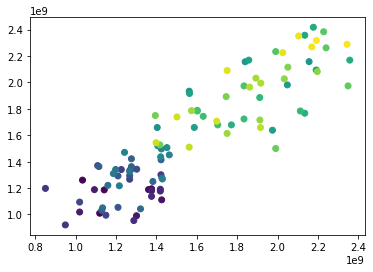

In [30]:
# How does the data look after seeing the description?

plt.scatter(pred, y_test, c=X_test["date"]);

In [31]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R squared:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 156238387.869
Mean Squared Error: 3.643677883893266e+16
Root Mean Squared Error: 190884202.696118
R squared: 0.7816465544988589


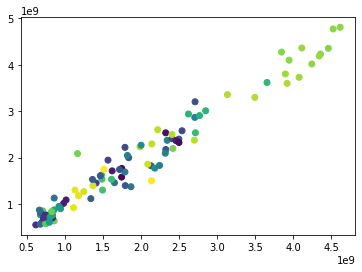

In [32]:
# How does the data look after seeing the description?

plt.scatter(pred_s, y_test_s, c=X_test_s["date"]);

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_s, pred_s))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_s, pred_s))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_s, pred_s)))
print('R squared:', metrics.r2_score(y_test_s, pred_s))

Mean Absolute Error: 173818859.3865
Mean Squared Error: 5.2073866147720376e+16
Root Mean Squared Error: 228196989.78671998
R squared: 0.959389203699007


In [34]:
pipe.named_steps['model'].feature_importances_
#pipe.pipeline.named_steps['predictor'].get_feature_names()

forest_importances = pd.Series(data=pipe.named_steps['model'].feature_importances_, index=list(X.columns))
#forest_importances.plot.bar()

impdf = pd.DataFrame(forest_importances)
impdf.columns = ["imp"]
impdf.sort_values(by='imp', ascending=False)

,imp
y____lag2,0.204569
y____lag7,0.162894
y____lag4,0.155830
y____lag1,0.146962
y____lag6,0.126954
y____lag3,0.119781
y____lag5,0.068406
date,0.014605
